<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/G%C3%BCnesEnerjiliElektrikliAracBataryaYonetimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

•	Güneş Enerjili Elektrikli Araç Batarya Yönetimi

1. Güneş Enerjisi Verisi Kaynakları
A) Simüle Edilmiş Veri (Hızlı Başlangıç)
Python ile güneş paneli çıkışını modelledim (örnek kod aşağıda).

Parametreler: Işınım (W/m²), Panel Verimliliği (%18-22), Sıcaklık, Gölgelenme.

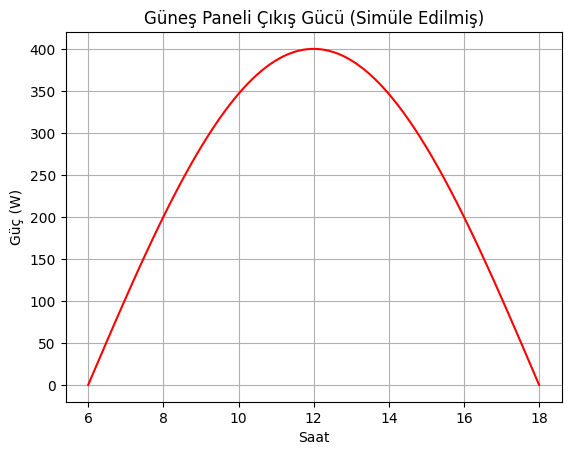

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simüle edilmiş güneş verisi (6:00-18:00 arası)
hours = np.linspace(6, 18, 100)
solar_irradiance = 1000 * np.sin((hours - 6) * np.pi / 12)  # W/m²
panel_efficiency = 0.20
solar_power = solar_irradiance * panel_efficiency * 2  # 2 m² panel alanı

plt.plot(hours, solar_power, 'r-')
plt.title("Güneş Paneli Çıkış Gücü (Simüle Edilmiş)")
plt.xlabel("Saat")
plt.ylabel("Güç (W)")
plt.grid()
plt.show()

2. Batarya Verisi Kaynakları
A) Simüle Edilmiş Li-ion Batarya Verisi

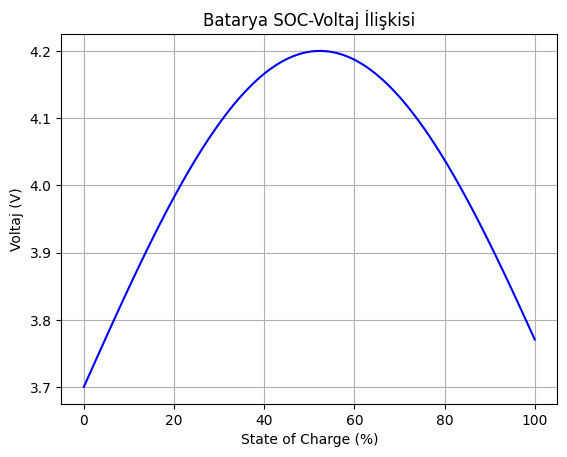

In [3]:
# Batarya şarj/deşarj eğrisi (SOC-Votaj ilişkisi)
SOC = np.linspace(0, 100, 100)
voltage = 3.7 + 0.5 * np.sin(SOC * 0.03)  # Basit model

plt.plot(SOC, voltage, 'b-')
plt.title("Batarya SOC-Voltaj İlişkisi")
plt.xlabel("State of Charge (%)")
plt.ylabel("Voltaj (V)")
plt.grid()
plt.show()

1. Güneş Enerjisi Verisi İndirme & Analiz
Kaynak: NASA POWER API (Ücretsiz meteorolojik veri)

Adım 1: API ile Veri Çekme

In [4]:
import requests
import pandas as pd

# API parametreleri (İstanbul örneği)
url = "https://power.larc.nasa.gov/api/temporal/hourly/point"
params = {
    "parameters": "ALLSKY_SFC_SW_DWN",  # Güneş ışınımı (W/m²)
    "community": "RE",
    "longitude": 29.0,
    "latitude": 41.0,
    "start": "20230101",
    "end": "20230107",
    "format": "JSON"
}

response = requests.get(url, params=params)
data = response.json()

# Veriyi DataFrame'e dönüştürme
solar_data = pd.DataFrame.from_dict(data["properties"]["parameter"]["ALLSKY_SFC_SW_DWN"], orient="index")
solar_data = solar_data.reset_index()
solar_data.columns = ["Tarih", "Güneş_Işınımı_W_m2"]
print(solar_data.head())

        Tarih  Güneş_Işınımı_W_m2
0  2023010100                 0.0
1  2023010101                 0.0
2  2023010102                 0.0
3  2023010103                 0.0
4  2023010104                 0.0


Adım 2: Görselleştirme


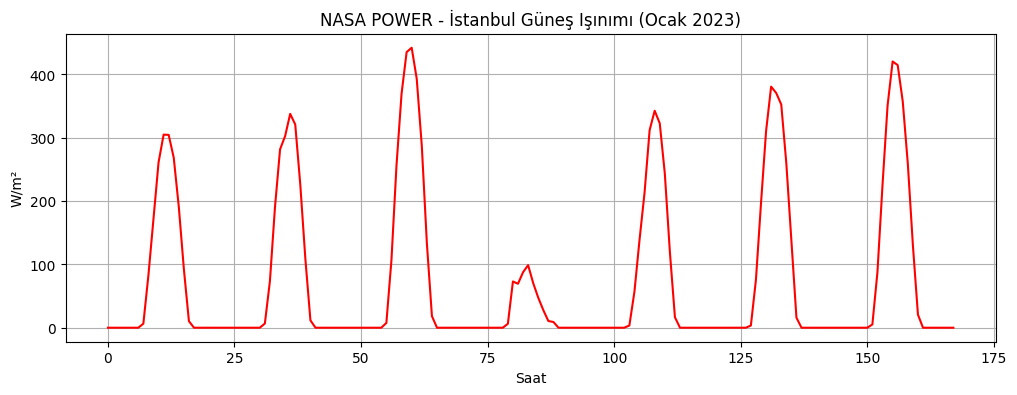

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(solar_data["Güneş_Işınımı_W_m2"], 'r-')
plt.title("NASA POWER - İstanbul Güneş Işınımı (Ocak 2023)")
plt.xlabel("Saat")
plt.ylabel("W/m²")
plt.grid()
plt.show()

2. Simüle Edilmiş Batarya Verisi (Hızlı Çözüm)
Gerçek veri bulamazsanız, aşağıdaki kodu kullanabilirsiniz:

In [6]:
import numpy as np
import pandas as pd

# Simüle edilmiş LFP batarya verisi
np.random.seed(42)
time = np.arange(0, 100, 0.1)
voltage = 3.2 + 0.5 * np.sin(time * 0.1) + np.random.normal(0, 0.02, len(time))
current = 5 * np.exp(-0.01 * time) + np.random.normal(0, 0.1, len(time))
soc = 100 - time * 0.5 + np.random.normal(0, 1, len(time))

battery_data = pd.DataFrame({
    "Time(s)": time,
    "Voltage(V)": voltage,
    "Current(A)": current,
    "SOC(%)": soc
})

print(battery_data.head())

   Time(s)  Voltage(V)  Current(A)     SOC(%)
0      0.0    3.209934    5.139936  99.324822
1      0.1    3.202235    5.087466  99.805481
2      0.2    3.222953    4.995973  99.107580
3      0.3    3.245458    4.920329  99.542038
4      0.4    3.215312    5.049862  97.906385


4. Başlangıç Projesi Önerisi
Hedef: Güneş enerjisiyle şarj olan bir bataryanın SOC tahmini.

In [7]:
# Basit Coulomb Sayımı Algoritması
current = 5  # A (örnek sabit akım)
capacity = 1000  # Wh
SOC = 50  # %

def update_soc(SOC, current, time_hours):
    delta_soc = (current * 12 * time_hours) / capacity * 100  # 12V sistem varsayımı
    return max(0, min(100, SOC + delta_soc))

new_soc = update_soc(SOC, 5, 2)  # 2 saat 5A şarj
print(f"Yeni SOC: %{new_soc:.2f}")

Yeni SOC: %62.00


1. Veri İşleme: Zaman Serisi Analizi
Adım 1: Eksik Veri Temizleme ve Özellik Mühendisliği

In [8]:
# DÜZGÜN KOD:
import pandas as pd
import numpy as np

# Örnek veri oluşturma (Güneş + Batarya) - DÜZELTİLMİŞ HALİ
dates = pd.date_range("2023-01-01", periods=24*7, freq="H")
data = pd.DataFrame({  # Açılan süslü parantez
    "Tarih": dates,
    "Güneş_Işınımı": np.abs(np.sin(np.arange(0, 24*7) * 0.5) + np.random.normal(0, 0.1, 24*7)) * 1000,
    "Batarya_Voltaj": np.clip(3.2 + np.sin(np.arange(0, 24*7)/10) + np.random.normal(0, 0.05, 24*7), 2.5, 4.2),
    "Akım": np.random.normal(5, 1, 24*7)  # Son satırda virgül yok
})  # Kapatan süslü parantez

print("Veri Çerçevesi Başarıyla Oluşturuldu!")
print(data.head())

Veri Çerçevesi Başarıyla Oluşturuldu!
                Tarih  Güneş_Işınımı  Batarya_Voltaj      Akım
0 2023-01-01 00:00:00     190.780756        3.195169  3.634176
1 2023-01-01 01:00:00     393.387038        3.279035  4.851031
2 2023-01-01 02:00:00     800.110431        3.351382  5.502784
3 2023-01-01 03:00:00    1186.263752        3.525933  6.796361
4 2023-01-01 04:00:00     964.952739        3.523562  5.706079


<ipython-input-8-7852edd7d121>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range("2023-01-01", periods=24*7, freq="H")


Adım 2: Hareketli Ortalama ile Düzgünleştirme

<Axes: xlabel='Tarih'>

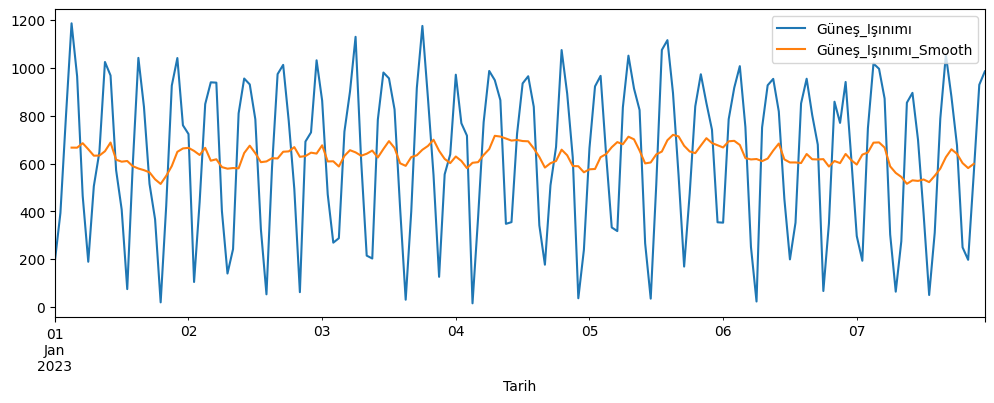

In [9]:
data["Güneş_Işınımı_Smooth"] = data["Güneş_Işınımı"].rolling(window=6, center=True).mean()
data.plot(x="Tarih", y=["Güneş_Işınımı", "Güneş_Işınımı_Smooth"], figsize=(12,4))

2. MPPT Algoritması (P&O Metodu)
Adım 1: PV Panel Simülasyonu

Text(0, 0.5, 'Güç (W)')

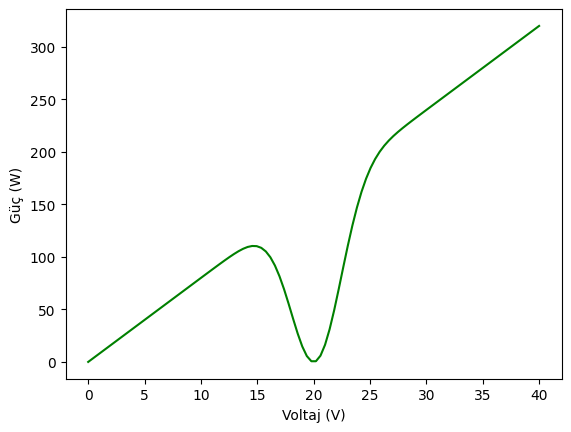

In [10]:
# PV Panel Karakteristik Eğrisi
V_pv = np.linspace(0, 40, 100)
I_pv = 8 * (1 - np.exp(-0.1*(V_pv-20)**2))  # Simüle edilmiş I-V eğrisi
P_pv = V_pv * I_pv

plt.plot(V_pv, P_pv, 'g-')
plt.xlabel("Voltaj (V)")
plt.ylabel("Güç (W)")

Adım 2: P&O Algoritması Uygulama


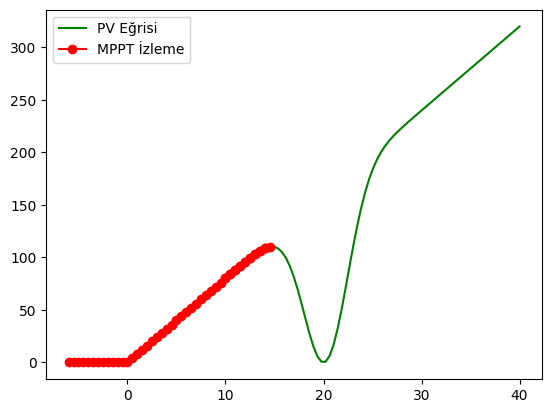

In [11]:
def mppt_po(voltage_start=10, steps=50, delta_V=0.5):
    V = [voltage_start]
    P = [np.interp(voltage_start, V_pv, P_pv)]

    for _ in range(steps):
        V_test = V[-1] + delta_V
        P_test = np.interp(V_test, V_pv, P_pv)

        if P_test > P[-1]:
            delta_V = abs(delta_V)
        else:
            delta_V = -abs(delta_V)

        V.append(V[-1] + delta_V)
        P.append(np.interp(V[-1], V_pv, P_pv))

    return V, P

V_mppt, P_mppt = mppt_po()
plt.plot(V_pv, P_pv, 'g-', label="PV Eğrisi")
plt.plot(V_mppt, P_mppt, 'ro-', label="MPPT İzleme")
plt.legend()

3. LSTM ile SOC Tahmini
Adım 1: Veri Hazırlama

Adım 2: LSTM Modeli


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.1849 - val_loss: 0.1282
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0223 - val_loss: 0.1501
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0169 - val_loss: 0.1254
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0157 - val_loss: 0.1257
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0131 - val_loss: 0.1019
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0100 - val_loss: 0.0816
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - val_loss: 0.1044
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0106 - val_loss: 0.0889
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - val_loss: 0.0646
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058 - val_loss: 0.0314
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0066 - val_loss: 0.0856
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0061 - val_l

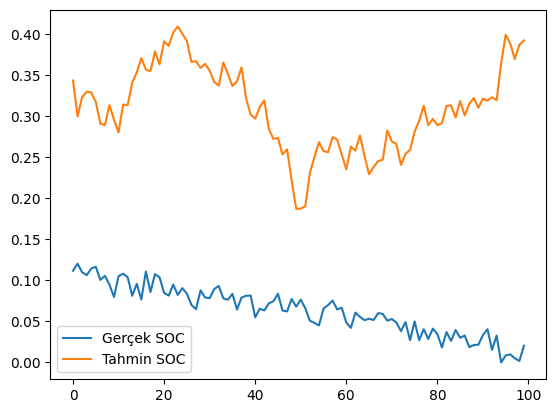

In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. ÖRNEK VERİ OLUŞTURMA
time = np.arange(0, 1000)
soc = 100 - time/10 + np.random.normal(0, 1, len(time))
voltage = 3.2 + 0.5 * np.sin(time * 0.1) + np.random.normal(0, 0.02, len(time))
current = 5 * np.exp(-0.01 * time) + np.random.normal(0, 0.1, len(time))

data = pd.DataFrame({
    "Time": time,
    "Voltage": voltage,
    "Current": current,
    "SOC": soc
})

# 2. VERİ HAZIRLAMA
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Voltage", "Current", "SOC"]])

# 3. ZAMAN SERİSİ VERİ SETİ OLUŞTURMA
def create_dataset(data, look_back=24):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), :-1])  # Son sütun (SOC) hariç
        y.append(data[i+look_back, -1])       # Sadece SOC
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)  # X artık tanımlı!

# 4. MODEL OLUŞTURMA
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5. MODEL EĞİTİMİ
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# 6. TAHMİN VE GÖRSELLEŞTİRME
test_predict = model.predict(X[-100:])
plt.plot(y[-100:], label="Gerçek SOC")
plt.plot(test_predict, label="Tahmin SOC")
plt.legend()
plt.show()

4. Entegre Sistem Simülasyonu


In [13]:
# 1. Önce scaler'ı uygun şekilde tanımlayalım
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[["Voltage", "Current", "SOC"]])

# 2. Düzeltilmiş tahmin döngüsü
for i in range(24, len(data)):  # 24. indeksten başla
    # MPPT gücü
    _, P_opt = mppt_po(voltage_start=data.loc[i, "Voltage"], steps=1)

    # SOC güncelleme
    delta_SOC = (P_opt[-1] * 0.1) / 5000 * 100
    data.loc[i, "SOC"] = min(100, data.loc[i, "SOC"] + delta_SOC)

    # LSTM için veri hazırlama (Kesinlikle 24 zaman adımı)
    input_window = data.loc[i-24:i-1, ["Voltage", "Current", "SOC"]]  # 24 satır
    input_scaled = scaler.transform(input_window)
    input_reshaped = input_scaled[:, :-1].reshape(1, 24, 2)  # SOC hariç

    # Tahmin
    data.loc[i, "SOC_Predicted"] = model.predict(input_reshaped)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

5. Sonuç Görselleştirme


In [14]:
# 1. Önce scaler'ı uygun şekilde tanımlayalım
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[["Voltage", "Current", "SOC"]])

# 2. Düzeltilmiş tahmin döngüsü
for i in range(24, len(data)):  # 24. indeksten başla
    # MPPT gücü
    _, P_opt = mppt_po(voltage_start=data.loc[i, "Voltage"], steps=1)

    # SOC güncelleme
    delta_SOC = (P_opt[-1] * 0.1) / 5000 * 100
    data.loc[i, "SOC"] = min(100, data.loc[i, "SOC"] + delta_SOC)

    # LSTM için veri hazırlama (Kesinlikle 24 zaman adımı)
    input_window = data.loc[i-24:i-1, ["Voltage", "Current", "SOC"]]  # 24 satır
    input_scaled = scaler.transform(input_window)
    input_reshaped = input_scaled[:, :-1].reshape(1, 24, 2)  # SOC hariç

    # Tahmin
    data.loc[i, "SOC_Predicted"] = model.predict(input_reshaped)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [ ]:
print("Mevcut sütunlar:", data.columns.tolist())

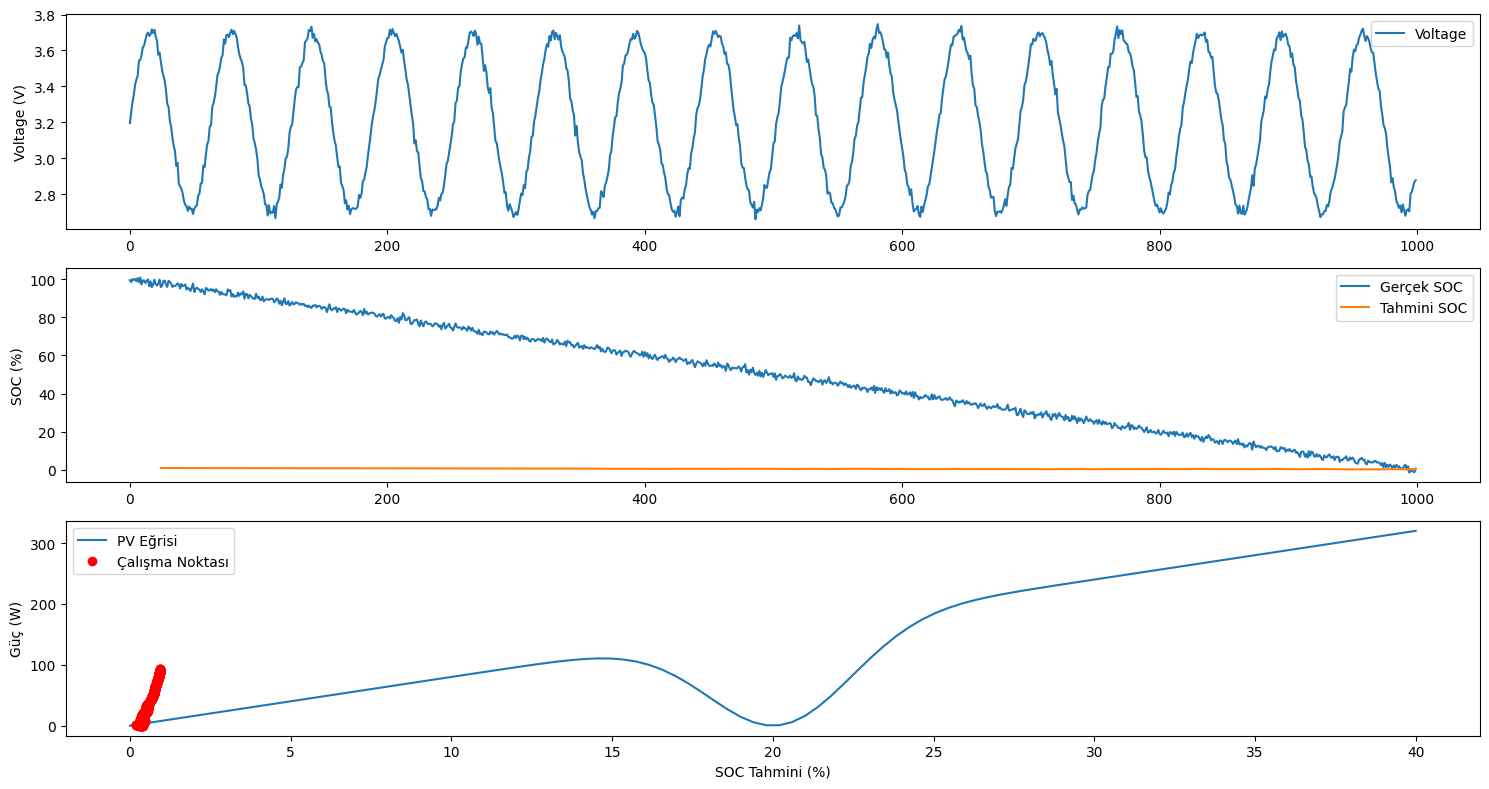

In [18]:
plt.figure(figsize=(15, 8))

# 1. Grafik - Voltage vs. Time
plt.subplot(3, 1, 1)
plt.plot(data["Time"], data["Voltage"], label="Voltage")  # "SOC" yerine "Voltage" yazıldı
plt.ylabel("Voltage (V)")
plt.legend()

# 2. Grafik - SOC Karşılaştırması
plt.subplot(3, 1, 2)
plt.plot(data["Time"], data["SOC"], label="Gerçek SOC")
plt.plot(data["Time"], data["SOC_Predicted"], label="Tahmini SOC")
plt.ylabel("SOC (%)")
plt.legend()

# 3. Grafik - PV Eğrisi (Dikkat: V_pv ve P_pv tanımlı mı?)
plt.subplot(3, 1, 3)
plt.plot(V_pv, P_pv, label="PV Eğrisi")
plt.plot(
    data["SOC_Predicted"],
    data["SOC_Predicted"] * data["SOC"],  # Bu formülün mantığını kontrol edin!
    "ro",
    label="Çalışma Noktası"
)
plt.xlabel("SOC Tahmini (%)")
plt.ylabel("Güç (W)")
plt.legend()

plt.tight_layout()
plt.show()